In [ ]:
!pip install keras

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.datasets import fashion_mnist
import keras
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


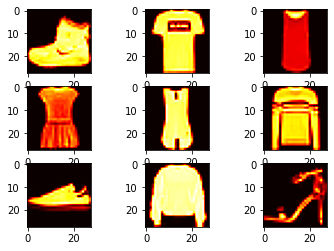

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i],cmap='hot')
plt.show()

In [ ]:
print(X_train[1])
print('done')
print(y_train[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

X_test=X_test.astype('float32')
X_train=X_train.astype('float32')

X_train=X_train/255
X_test=X_test/255



y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.5631 - accuracy: 0.7936
Epoch 2/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3835 - accuracy: 0.8624
Epoch 3/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.3330 - accuracy: 0.8786
Epoch 4/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.3087 - accuracy: 0.8875
Epoch 5/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.2864 - accuracy: 0.8941


In [ ]:
loss,acc=model.evaluate(X_test,y_test)
print(loss)
print(acc)

10000/10000 [==============================] - 1s 127us/step
0.2793160017490387
0.8964999914169312


In [ ]:
prd=model.predict(X_test)
print(np.argmax(np.round(prd[3])))

1


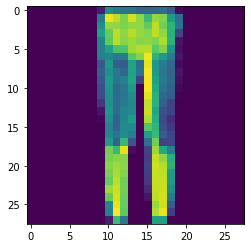

In [ ]:
plt.imshow(X_test[3].reshape(28,28),)
plt.show()